# The diffusion equation in `OceanTurb.jl`

Here we demonstrate how to set up a `Model` in `OceanTurb.jl`, set initial conditions and boundary conditions, and iterate the model forward.

In [1]:
using Pkg; Pkg.activate(".."); Pkg.instantiate()

using OceanTurb.Diffusion, PyPlot, PyPlotPlus

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`


┌ Info: Recompiling stale cache file /Users/gregorywagner/.julia/compiled/v1.0/OceanTurb/9iboO.ji for OceanTurb [d848d694-35fd-11e9-1c91-9995598ac29e]
└ @ Base loading.jl:1187


In [4]:
# First, we define the model.
model = Model(nz=200, Lz=100.0, κ=1);

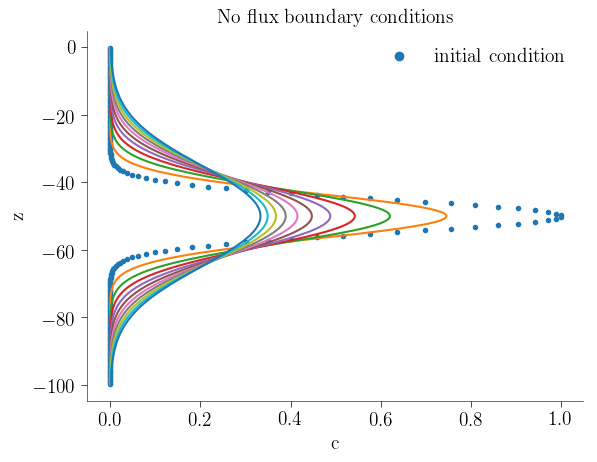

In [6]:
# Next we use a simple initial condition and iterate forward
Lz = model.grid.Lz
z0, dz = -Lz/2, Lz/20
c0(z) = exp(-(z-z0)^2 / 2dz^2)

# Set c to the function c0(z) --- enabled by some OceanTurb.jl syntactic sugar
model.solution.c = c0

# Run and plot
ax, fig = subplots()
xlabel("c")
ylabel("z")
title("No flux boundary conditions")
cornerspines()

plot(model.solution.c.data, zdata(model.solution.c), ".", label="initial condition")

dt = 0.01
nt = 1000
ni = 10

for i = 1:ni
    iterate!(model, dt, nt)
    plot(model.solution.c.data, zdata(model.solution.c))
end

legend();

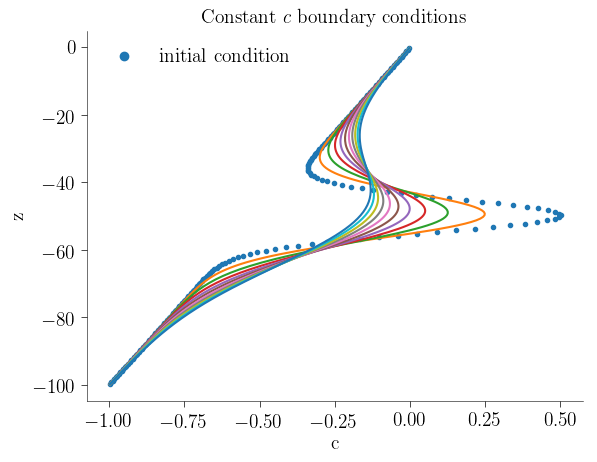

In [7]:
c0(z) = exp(-(z-z0)^2 / 2dz^2) + z/Lz
model.solution.c = c0

bottom_bc = ValueBC(Bottom, -1.0)
top_bc = ValueBC(Top, 0.0)

set_bcs!(model, c=(bottom_bc, top_bc))

# Run and plot
ax, fig = subplots()
xlabel("c")
ylabel("z")
title("Constant \$c\$ boundary conditions")
cornerspines()

plot(model.solution.c.data, zdata(model.solution.c), ".", label="initial condition")

dt = 0.01
nt = 1000
ni = 10

for i = 1:ni
    iterate!(model, dt, nt)
    plot(model.solution.c.data, zdata(model.solution.c))
end

legend();